## Credit Card Fraud
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# More details on data
print(data.shape)
print(data.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null 

In [4]:
# Describe data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Examine labels
print('\nUnique values per column:')
print(data.nunique())


Unique values per column:
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [6]:
# Check for nulls
data = data.replace(' ', np.nan)
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Check for columns with duplicate values
duplicated_feat = []
for i in range(0, len(data.columns)):
    if i % 10 == 0:  # Keep track of the loop
        print('loop tracker', i)

    col_1 = data.columns[i]

    for col_2 in data.columns[i + 1:]:
        if data[col_1].equals(data[col_2]):
            duplicated_feat.append(col_2)
            
# Number of duplicated features
print('Number of duplicated features', len(set(duplicated_feat)))

loop tracker 0
loop tracker 10
loop tracker 20
loop tracker 30
Number of duplicated features 0


In [8]:
# Examine target
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Percentage')

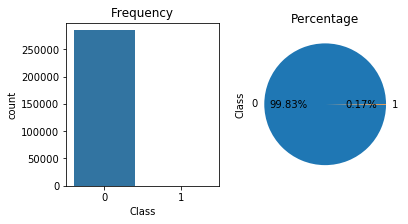

In [9]:
# Compare target values
fig, axs = plt.subplots(1,2,figsize=(6,3))
sns.countplot(data['Class'],ax=axs[0])
axs[0].set_title('Frequency')
data['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1], autopct='%1.2f%%')
axs[1].set_title('Percentage')

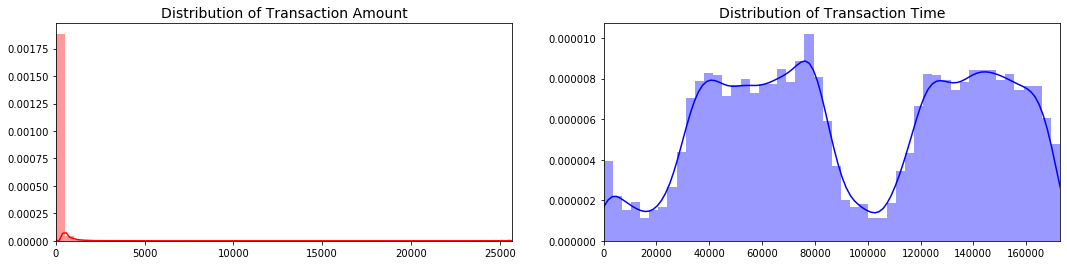

In [10]:
# Check some distributions

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [11]:
# Scale Time and Amount
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler() # RobustScaler is less prone to outliers
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
# Reorganize columns
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
from sklearn.model_selection import StratifiedKFold

X = data.drop('Class', axis=1)
y = data['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [14]:
# Check label distribution 
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [15]:
# Sample 492 from non-fraud for balanced dataframe
temp = data.sample(frac=1)
fraud_df = temp.loc[temp['Class'] == 1]
non_fraud_df = temp.loc[temp['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
df = normal_distributed_df.sample(frac=1, random_state=42)

print(df.shape)

(984, 31)


Text(0.5, 1.0, 'Percentage')

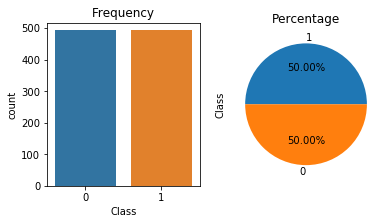

In [16]:
# Compare target values
fig, axs = plt.subplots(1,2,figsize=(6,3))
sns.countplot(df['Class'],ax=axs[0])
axs[0].set_title('Frequency')
df['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1], autopct='%1.2f%%')
axs[1].set_title('Percentage')

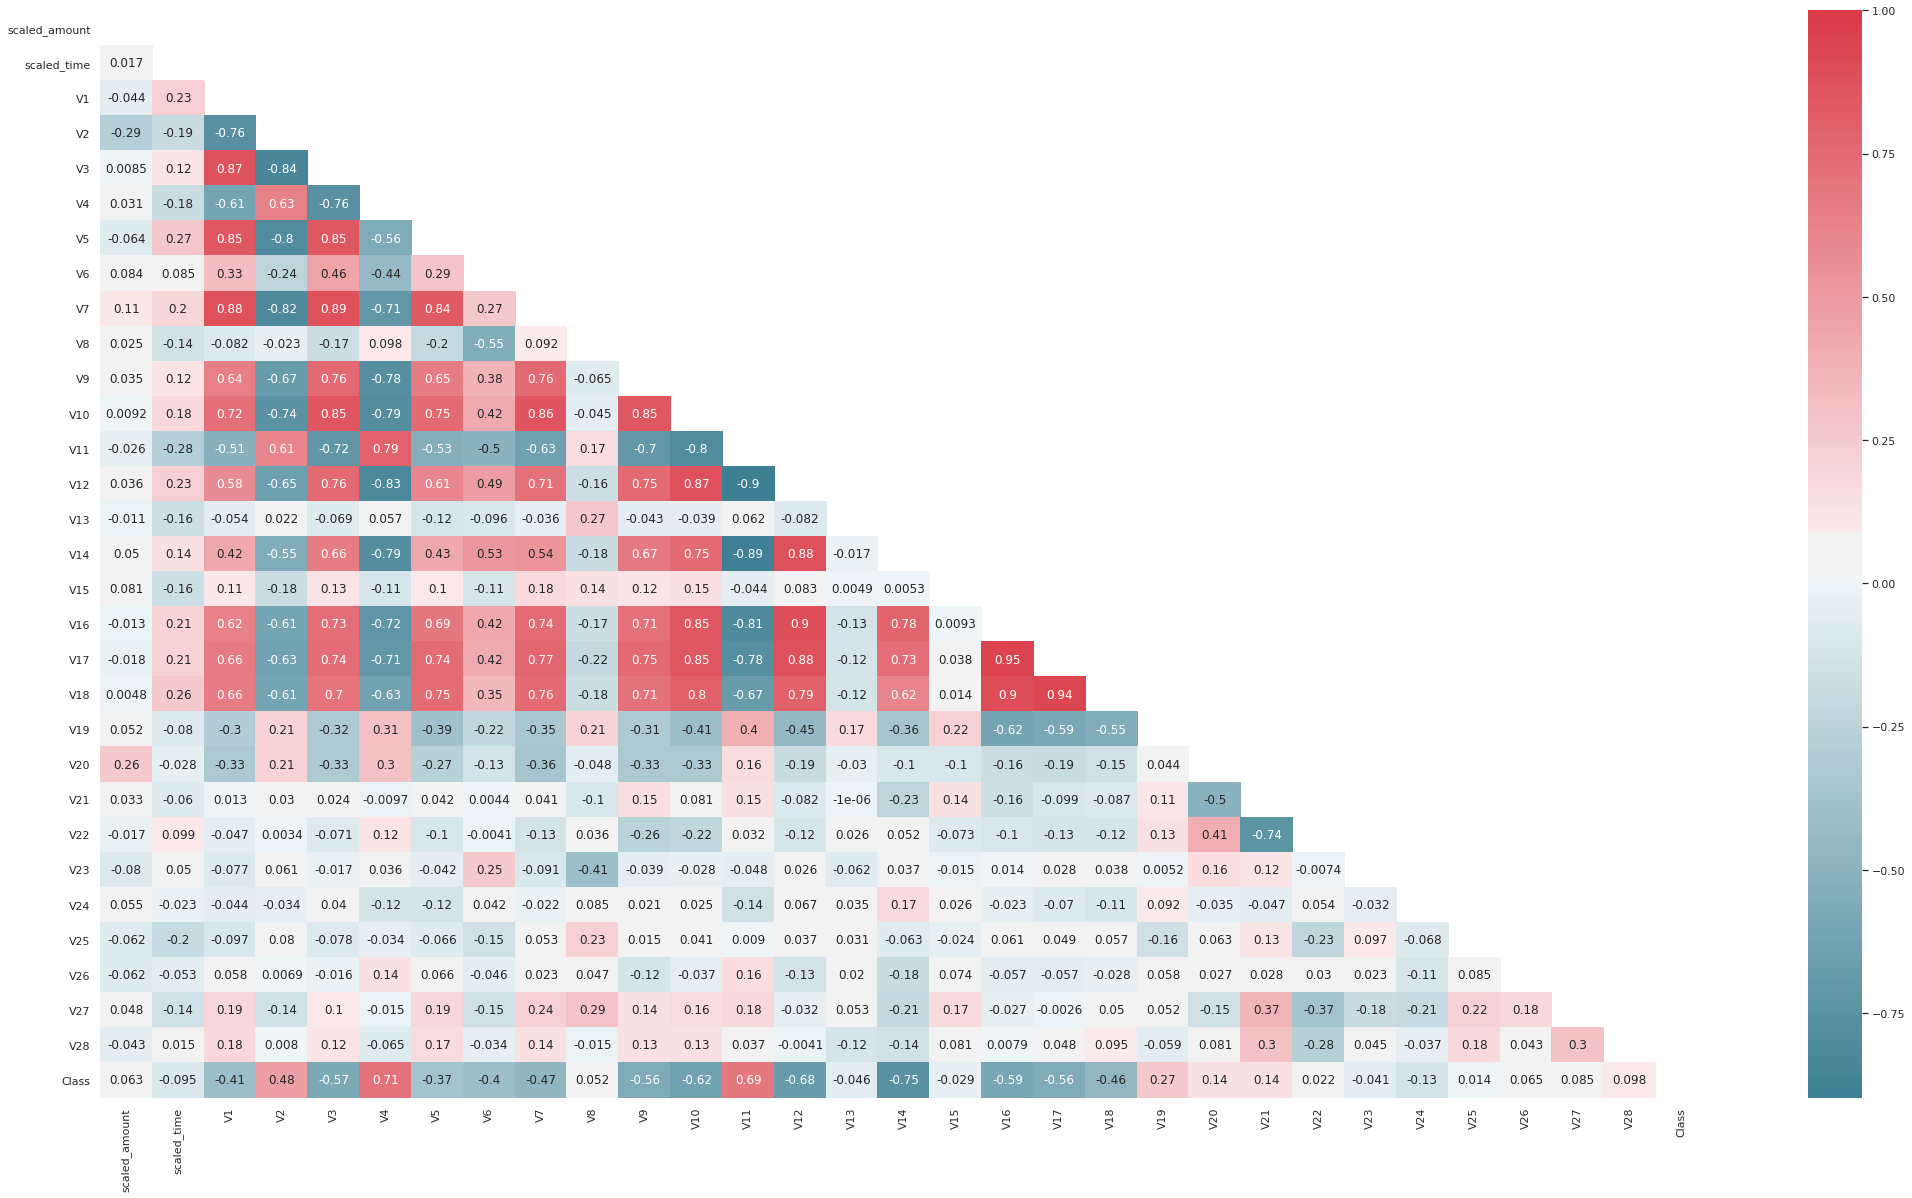

In [17]:
# Correlation
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(36,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)

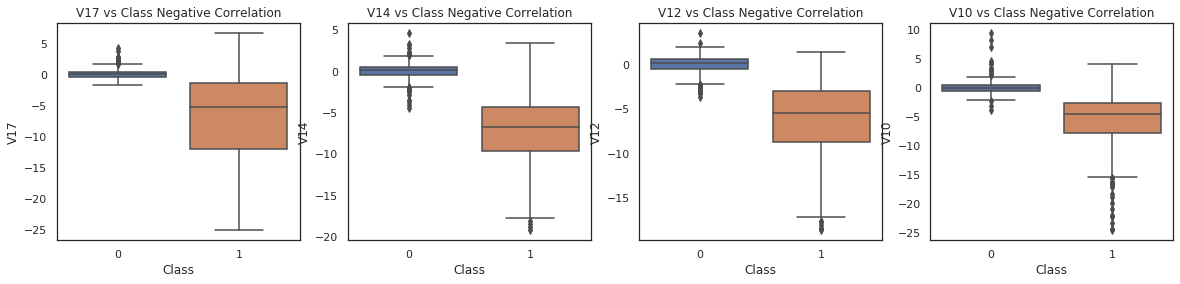

In [18]:
# Lower feature value, higher fraud probability
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

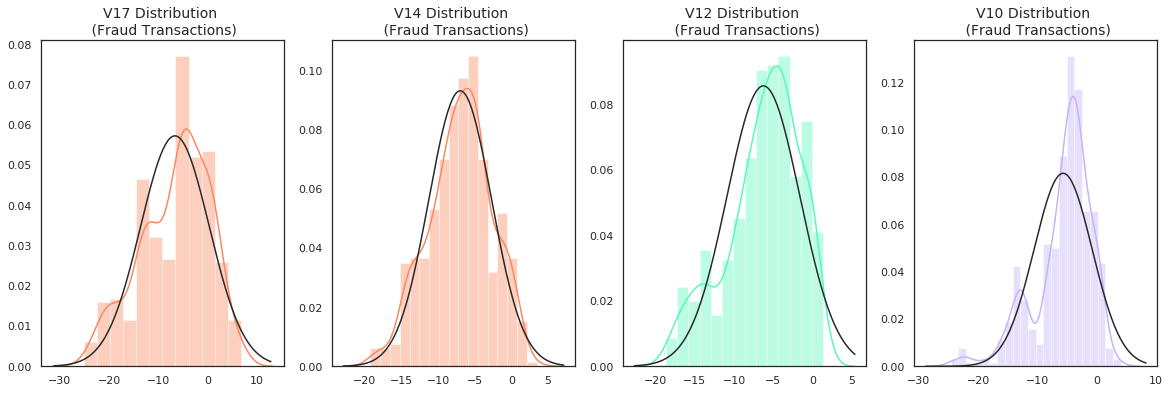

In [19]:
# Distributions of fraud
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

v17_fraud_dist = df['V17'].loc[df['Class'] == 1].values
sns.distplot(v17_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax3, fit=norm, color='#56F9BB')
ax3.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [20]:
# Remove outliers from V17
v17_fraud = df['V17'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v17_iqr = q75 - q25
print('iqr: {}'.format(v17_iqr))

v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('Cut Off: {}'.format(v17_cut_off))
print('V17 Lower: {}'.format(v17_lower))
print('V17 Upper: {}'.format(v17_upper))

outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('Feature V17 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V17 outliers:{}'.format(outliers))

df = df.drop(df[(df['V17'] > v17_upper) | (df['V17'] < v17_lower)].index)

Quartile 25: -11.945057187644572 | Quartile 75: -1.34193993162032
iqr: 10.603117256024252
Cut Off: 15.904675884036378
V17 Lower: -27.84973307168095
V17 Upper: 14.562735952416057
Feature V17 Outliers for Fraud Cases: 0
V17 outliers:[]


In [21]:
v14_fraud = df['V14'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.8220867423816, -19.2143254902614, -18.4937733551053, -18.049997689859396]


In [22]:
v12_fraud = df['V12'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 outliers: {}'.format(outliers))

df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
V12 outliers: [-18.553697009645802, -18.683714633344298, -18.4311310279993, -18.047596570821604]


In [23]:
v10_fraud = df['V10'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers: {}'.format(outliers))

df = df.drop(df[(df['V10'] > v10_upper) | (df['V10'] < v10_lower)].index)

V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
Feature V10 Outliers for Fraud Cases: 27
V10 outliers: [-22.1870885620007, -17.141513641289198, -15.124162814494698, -16.2556117491401, -24.5882624372475, -14.9246547735487, -22.1870885620007, -22.1870885620007, -15.2399619587112, -18.9132433348732, -15.346098846877501, -24.403184969972802, -14.9246547735487, -22.1870885620007, -23.2282548357516, -15.2318333653018, -15.563791338730098, -19.836148851696, -18.2711681738888, -16.3035376590131, -15.1237521803455, -15.2399619587112, -20.949191554361104, -16.6496281595399, -15.563791338730098, -16.7460441053944, -16.6011969664137]


In [24]:
# Split data
from sklearn.model_selection import train_test_split

features = df.drop('Class', axis=1)
target = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.3,
    random_state=1)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (661, 30)
X_test shape:  (284, 30)
y_train shape:  (661,)
y_test shape:  (284,)


In [25]:
# Outliers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [26]:
# Use Gridsearch to get best hyperparameters
from sklearn.model_selection import GridSearchCV

In [27]:
print(X_train.head())

        scaled_amount  scaled_time        V1        V2        V3        V4  \
33123        0.374904    -0.559123  1.084046 -0.145600  0.585647  0.910791   
205920       0.361909     0.602451 -2.259519 -0.727556  1.205032 -0.199717   
232394      -0.167819     0.733796  1.961343 -0.715029 -1.703147 -0.613582   
164012       0.111647     0.372408  1.987356 -0.207512 -1.211691  0.249399   
262560      -0.241878     0.891047  0.567539  3.309385 -6.631268  6.394574   

              V5        V6        V7        V8  ...       V19       V20  \
33123  -0.636998 -0.438003 -0.084928  0.010450  ... -0.271782 -0.123900   
205920  1.188336  0.291861  0.596748 -0.079966  ...  1.583879 -0.630122   
232394  1.713865  3.913136 -1.252671  1.054911  ... -0.358386 -0.143399   
164012  0.031988 -0.698712  0.104707 -0.168372  ...  0.547855 -0.152750   
262560 -0.054172 -2.396535 -2.792489  0.514811  ... -1.018639  0.555412   

             V21       V22       V23       V24       V25       V26       V27  \


In [28]:
# Logistic Regression
lr_clf_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
grid_lr_clf = GridSearchCV(LogisticRegression(solver='liblinear'), lr_clf_params)
grid_lr_clf.fit(X_train, y_train)
lr_clf = grid_lr_clf.best_estimator_
print(lr_clf)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [29]:
# KNN
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knn_clf = grid_knears.best_estimator_
print(knn_clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [30]:
# SVC
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc_clf = grid_svc.best_estimator_
print(svc_clf)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [31]:
# DecisionTree 
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_
print(tree_clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [32]:
# Cross validation scores
lr_clf_score = cross_val_score(lr_clf, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(lr_clf_score.mean() * 100, 2).astype(str) + '%')

knears_clf_score = cross_val_score(knn_clf, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_clf_score.mean() * 100, 2).astype(str) + '%')

svc_clf_score = cross_val_score(svc_clf, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_clf_score.mean() * 100, 2).astype(str) + '%')

tree_clf_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_clf_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.95%
Knears Neighbors Cross Validation Score 93.19%
Support Vector Classifier Cross Validation Score 93.19%
DecisionTree Classifier Cross Validation Score 92.43%


In [33]:
# Plot learning curves
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Initialize shared values
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
n_jobs=4
train_sizes=np.linspace(.1, 1.0, 5)

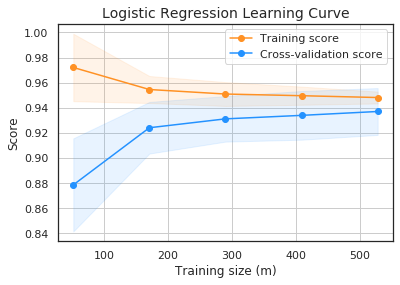

In [34]:
# Logistic Regression
fig = plt.figure
train_sizes, train_scores, test_scores = learning_curve(lr_clf, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="#ff9124")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
         label="Cross-validation score")
plt.title("Logistic Regression Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

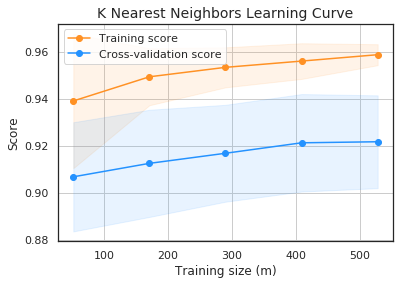

In [35]:
# K Nearest Neighbors 
fig = plt.figure()
train_sizes, train_scores, test_scores = learning_curve(knn_clf, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="#ff9124")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
         label="Cross-validation score")
plt.title("K Nearest Neighbors Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

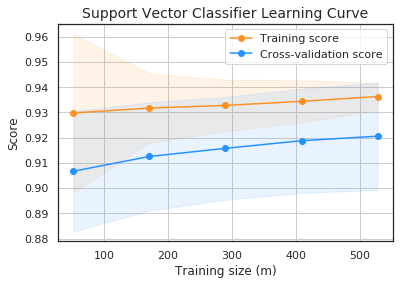

In [36]:
# Support Vectors
fig = plt.figure()
train_sizes, train_scores, test_scores = learning_curve(svc_clf, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="#ff9124")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
plt.title("Support Vector Classifier Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

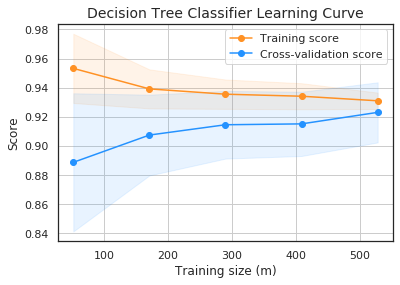

In [37]:
# Decision Tree
train_sizes, train_scores, test_scores = learning_curve(tree_clf, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="#ff9124")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
plt.title("Decision Tree Classifier Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

In [38]:
# ROC AUC Curve and Scores
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

lr_clf_pred = cross_val_predict(lr_clf, X_train, y_train, cv=5, method="decision_function")
knn_clf_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5)
svc_clf_pred = cross_val_predict(svc_clf, X_train, y_train, cv=5, method="decision_function")
tree_clf_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

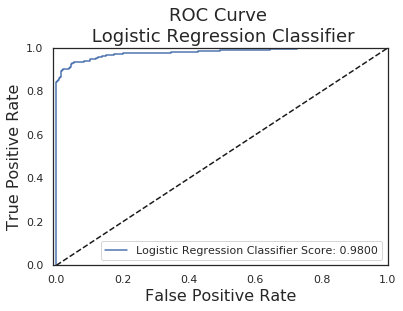

In [39]:
# Logistic Regression
log_fpr, log_tpr, log_thresold = roc_curve(y_train, lr_clf_pred)
plt.title('ROC Curve \n Logistic Regression Classifier', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, lr_clf_pred)))
# plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
# plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
# plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()

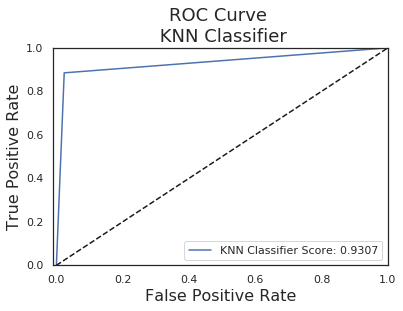

In [40]:
# K Nearest Classifier
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_train, knn_clf_pred)
plt.title('ROC Curve \n KNN Classifier', fontsize=18)
plt.plot(knn_fpr, knn_tpr, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knn_clf_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()

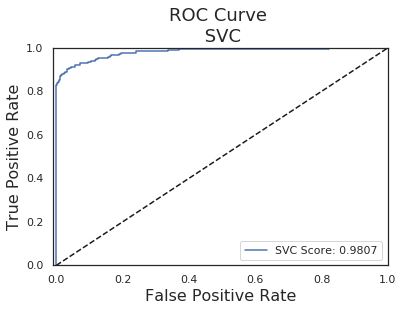

In [41]:
# Support Vector Classifier
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_train, svc_clf_pred)
plt.title('ROC Curve \n SVC', fontsize=18)
plt.plot(svc_fpr, svc_tpr, label='SVC Score: {:.4f}'.format(roc_auc_score(y_train, svc_clf_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()

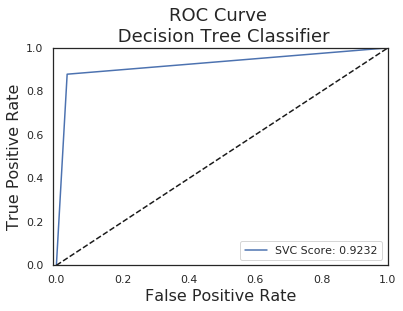

In [42]:
# Decision Tree Classifier
tree_fpr, tree_tpr, tree_thresold = roc_curve(y_train, tree_clf_pred)
plt.title('ROC Curve \n Decision Tree Classifier', fontsize=18)
plt.plot(tree_fpr, tree_tpr, label='SVC Score: {:.4f}'.format(roc_auc_score(y_train, tree_clf_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()

In [43]:
# Separate dataset into train and test for smote
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit

X = data.drop('Class', axis=1)
y = data['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

X_smote_train = original_Xtrain.values
X_smote_test = original_Xtest.values
y_smote_train = original_ytrain.values
y_smote_test = original_ytest.values

train_unique_label, train_counts_label = np.unique(y_smote_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_smote_test, return_counts=True)

print('Label Distributions:')
print(train_counts_label/ len(y_smote_train))
print(test_counts_label/ len(y_smote_test))

Using TensorFlow backend.


Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [44]:
throw an error

SyntaxError: invalid syntax (<ipython-input-44-182d068f54fc>, line 1)

In [49]:
# Initialize arrays for metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

sss = StratifiedShuffleSplit(n_splits=5)
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
rscv_lr = RandomizedSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, n_iter=4)

for train, test in skf.split(X_smote_train, y_smote_train):
    # SMOTE during cross validation
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rscv_lr) 
    model = pipeline.fit(X_smote_train[train], y_smote_train[train])
    best_est = rscv_lr.best_estimator_
    prediction = best_est.predict(X_smote_train[test])
    
    accuracy_lst.append(pipeline.score(X_smote_train[test], y_smote_train[test]))
    precision_lst.append(precision_score(y_smote_train[test], prediction))
    recall_lst.append(recall_score(y_smote_train[test], prediction))
    f1_lst.append(f1_score(y_smote_train[test], prediction))
    auc_lst.append(roc_auc_score(y_smote_train[test], prediction))
    
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))

accuracy: 0.9414348024931944
precision: 0.06110587662248078
recall: 0.9137293086660175
f1: 0.11273075141451186


In [50]:
# Compare undersampling and SMOTE
y_pred = lr_clf.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
balanced_df = pd.DataFrame(data=d)

score = balanced_df['Score']
balanced_df.drop('Score', axis=1, inplace=True)
balanced_df.insert(1, 'Score', score)

balanced_df

,Technique,Score
0,Random UnderSampling,0.933099
1,Oversampling (SMOTE),0.987553


In [56]:
# Smote initial data
from imblearn.over_sampling import SMOTE

X_train_smote, y_train_smote = SMOTE().fit_sample(original_Xtrain,original_ytrain)
X_train_smote_df = pd.DataFrame(X_train_smote, columns=original_Xtrain.columns)
y_train_smote_df = pd.DataFrame(y_train_smote)

X_test_smote, y_test_smote = SMOTE().fit_sample(original_Xtest,original_ytest)
X_test_smote_df = pd.DataFrame(X_test_smote, columns=original_Xtest.columns)
y_test_smote_df = pd.DataFrame(y_test_smote)

# y_test_smote_df.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [59]:
# Look at the orignal data
print('Original Data')
print(original_Xtrain.shape)
print(original_ytrain.value_counts())
print()
print('Undersample Data')
print(X_train.shape)
print(y_train.value_counts())
print()
print('Oversample Data')
print(X_train_smote_df.shape)
print(y_train_smote_df.Class.value_counts())

Original Data
(227846, 30)
0    227452
1       394
Name: Class, dtype: int64

Undersample Data
(661, 30)
0    339
1    322
Name: Class, dtype: int64

Oversample Data
(454904, 30)
1    227452
0    227452
Name: Class, dtype: int64


In [76]:
# Compare original, undersample, and oversample data
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping 

In [77]:
# Train and score original data

inputs = original_Xtrain.shape[1]
layers = inputs * 2
model1 = Sequential()
model1.add(Dense(layers, kernel_initializer = 'uniform', activation = 'relu', input_dim=inputs))
model1.add(Dense(inputs, activation='relu'))
model1.add(Dense(1, activation = 'sigmoid'))
opt = tf.keras.optimizers.Adam(0.01)
model1.compile(optimizer=opt, 
             loss='binary_crossentropy',
             metrics=['accuracy'])

print(model1.summary())

checkpoint = ModelCheckpoint('credit_card_fraud_checkpoint1.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,  
                          verbose = 1,
                          restore_best_weights = True)

# Define callback list
callbacks = [earlystop, checkpoint]

epochs = 25

history1 = model1.fit(original_Xtrain,
                    original_ytrain,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (original_Xtest, original_ytest),
                    callbacks=callbacks)

score1 = model1.evaluate(original_Xtest, original_ytest, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________
None
Train on 227846 samples, validate on 56961 samples
Epoch 1/25
226816/227846 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9988
Epoch 00001: val_loss improved from inf to 0.00729, saving model to credit_card_fraud_checkpoint.h5
227846/227846 [==============================] - 11s 49us/sample - loss: 0.0140 - accuracy: 0.9988 - val_loss: 0.0073 - val_

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predictions1 = model1.predict(original_Xtest)
predictions1 = (predictions1 > 0.5)

print(confusion_matrix(original_ytest, predictions1))
print(classification_report(original_ytest, predictions1))

[[56855     8]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.76      0.82        98

    accuracy                           1.00     56961
   macro avg       0.95      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961



In [80]:
# Train and score undersampled data

inputs = original_Xtrain.shape[1]
layers = inputs * 2
model2 = Sequential()
model2.add(Dense(layers, kernel_initializer = 'uniform', activation = 'relu', input_dim=inputs))
model2.add(Dense(inputs, activation='relu'))
model2.add(Dense(1, activation = 'sigmoid'))
opt = tf.keras.optimizers.Adam(0.01)
model2.compile(optimizer=opt, 
             loss='binary_crossentropy',
             metrics=['accuracy'])

print(model2.summary())

checkpoint = ModelCheckpoint('credit_card_fraud_checkpoint2.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,  
                          verbose = 1,
                          restore_best_weights = True)

# Define callback list
callbacks = [earlystop, checkpoint]

epochs = 25

history2 = model2.fit(X_train,
                    y_train,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test),
                    callbacks=callbacks)

score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________
None
Train on 661 samples, validate on 284 samples
Epoch 1/25
 32/661 [>.............................] - ETA: 1s - loss: 0.6968 - accuracy: 0.4688
Epoch 00001: val_loss improved from inf to 0.21349, saving model to credit_card_fraud_checkpoint2.h5
661/661 [==============================] - 0s 258us/sample - loss: 0.2740 - accuracy: 0.8714 - val_loss: 0.2135 - val_accuracy: 0.9296

In [81]:
predictions2 = model2.predict(X_test)
predictions2 = (predictions2 > 0.5)

print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, predictions2))

[[145   4]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       149
           1       0.97      0.88      0.92       135

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



In [85]:
# Train and score oversampled data

inputs = original_Xtrain.shape[1]
layers = inputs * 2
model3 = Sequential()
model3.add(Dense(layers, kernel_initializer = 'uniform', activation = 'relu', input_dim=inputs))
model3.add(Dense(inputs, activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))
opt = tf.keras.optimizers.Adam(0.01)
model3.compile(optimizer=opt, 
             loss='binary_crossentropy',
             metrics=['accuracy'])

print(model3.summary())

checkpoint = ModelCheckpoint('credit_card_fraud_checkpoint3.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,  
                          verbose = 1,
                          restore_best_weights = True)

# Define callback list
callbacks = [earlystop, checkpoint]

epochs = 25

history3 = model3.fit(X_train_smote,
                    y_train_smote,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test_smote, y_test_smote),
                    callbacks=callbacks)

score3 = model3.evaluate(X_test_smote, y_test_smote, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_19 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 31        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________
None
Train on 454904 samples, validate on 113726 samples
Epoch 1/25
453664/454904 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9950
Epoch 00001: val_loss improved from inf to 1.08508, saving model to credit_card_fraud_checkpoint3.h5
454904/454904 [==============================] - 22s 49us/sample - loss: 0.0181 - accuracy: 0.9950 - val_loss: 1.0851 - va

In [88]:
predictions3 = model3.predict(X_test_smote)
predictions3 = (predictions3 > 0.5)

print('Original')
print(confusion_matrix(original_ytest, predictions1))
print(classification_report(original_ytest, predictions1))

print('Undersampled')
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, predictions2))

print('Oversampled')
print(confusion_matrix(y_test_smote, predictions3))
print(classification_report(y_test_smote, predictions3))

Original
[[56855     8]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.76      0.82        98

    accuracy                           1.00     56961
   macro avg       0.95      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Undersampled
[[145   4]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       149
           1       0.97      0.88      0.92       135

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284

Oversampled
[[56789    74]
 [11837 45026]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     56863
           1       1.00      0.79      0.88     56863

    accuracy                           0.90    113726
   macro 